### CUSTOMER CHURN PREDICTION

In [169]:
#Data manipulation and visualisation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
np.set_printoptions(suppress=True)
#Data preprocessing and feature extraction
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import Normalizer,MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import random
import seaborn as sns

# ML Algorithms 
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,BaggingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Model evaluation Functions
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,f1_score,accuracy_score,roc_auc_score
from pandas_profiling import ProfileReport
random.seed(0)

In [170]:
data= pd.read_csv('dataset.csv')
data.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,...,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,...,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,...,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,...,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,...,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,...,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,...,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,...,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,...,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,...,No,Bank transfer (automatic),56.15,3487.95,No


In [34]:
profile=ProfileReport(data, title='Basic data Overview',explorative=True)
profile.to_file('EDA.html')

In [49]:
temp=data['Churn'].value_counts()
print('Total Percentage of People which did not change company {}%'.format(temp[0]*100/(temp[0]+temp[1])) )
#Class 0 Percentage
print(temp)

Total Percentage of People which did not change company 73.46301292063042%
No     5174
Yes    1869
Name: Churn, dtype: int64


### The Dataset is considerably unbalanced/skewed given the small size of the dataset
 


In [50]:
data.dtypes

customerID          object 
gender              object 
SeniorCitizen       int64  
Partner             object 
Dependents          object 
tenure              int64  
PhoneService        object 
MultipleLines       object 
InternetService     object 
StreamingService    object 
Contract            object 
PaperlessBilling    object 
PaymentMethod       object 
MonthlyCharges      float64
TotalCharges        object 
Churn               object 
dtype: object

### Why is the TotalCharges datatype object?


In [51]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
StreamingService    0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
unique=[]
for i in data.columns:
    unique.append(data[i].nunique()) 
display(pd.DataFrame({'columnName':data.columns, 'UniqueValues':unique}))

,columnName,UniqueValues
0,customerID,7043
1,gender,2
2,SeniorCitizen,2
3,Partner,2
4,Dependents,2
5,tenure,73
6,PhoneService,2
7,MultipleLines,3
8,InternetService,3
9,StreamingService,3


In [53]:
for i in data['TotalCharges'].unique():
    try:
        a=float(i)
    except:
        print("Data",i)

Data  


In [54]:
data['TotalCharges'].str.isspace().sum()

11

The TotalCharges Column has empty Space in 11 cells. We need to replace those with the column mean/median/mode whichever is suitable

In [171]:
data['TotalCharges']=data['TotalCharges'].replace(" ",np.NaN)
data['TotalCharges']=data['TotalCharges'].astype(float)
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())
data['TotalCharges'].isnull().sum()

0

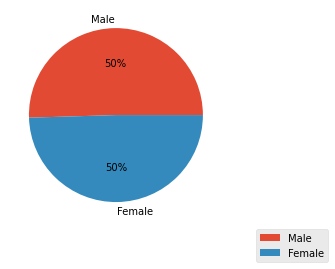

Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------


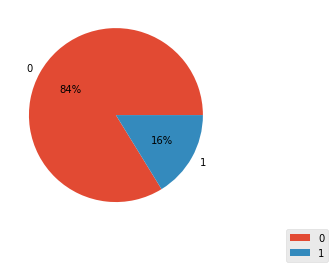

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------


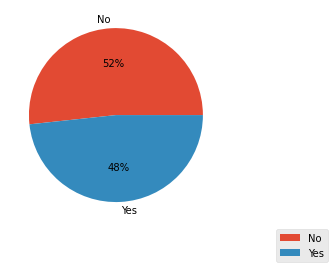

No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------


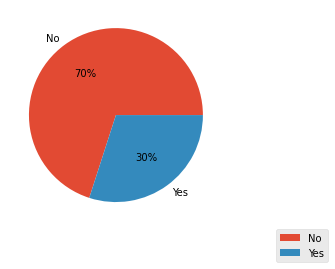

No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------


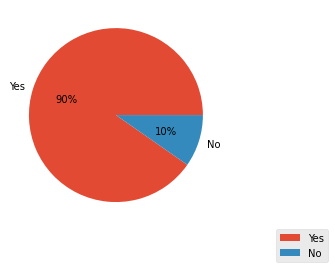

Yes    6361
No     682 
Name: PhoneService, dtype: int64
-------------------------------


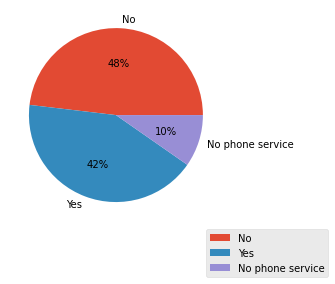

No                  3390
Yes                 2971
No phone service    682 
Name: MultipleLines, dtype: int64
-------------------------------


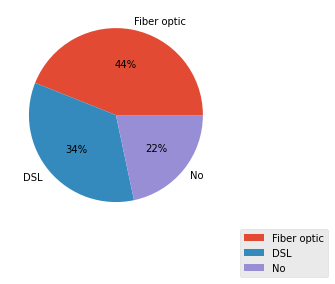

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------


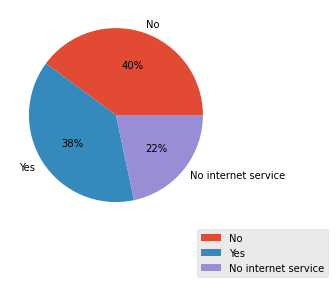

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingService, dtype: int64
-------------------------------


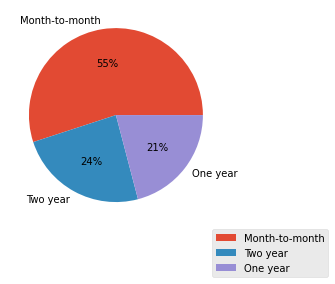

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
-------------------------------


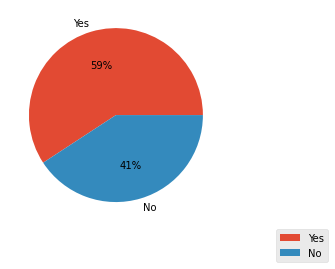

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
-------------------------------


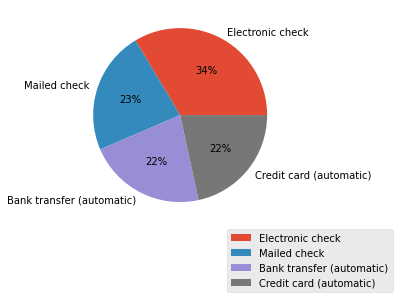

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
-------------------------------


In [43]:
#PIE PLOTS FOR ANALYZING FEATURE DISTRIBUTION EASILY
for i in data.columns[1:-1]:
    if data[i].nunique()<10:
       
        plt.figure()
        plt.pie(data[i].value_counts(),labels=list(data[i].value_counts().index),autopct='%1.0f%%')
        plt.legend(bbox_to_anchor=(1,-0.5, 0.5, 0.5))
        plt.show()
        print(data[i].value_counts())
        print('-------------------------------')
    

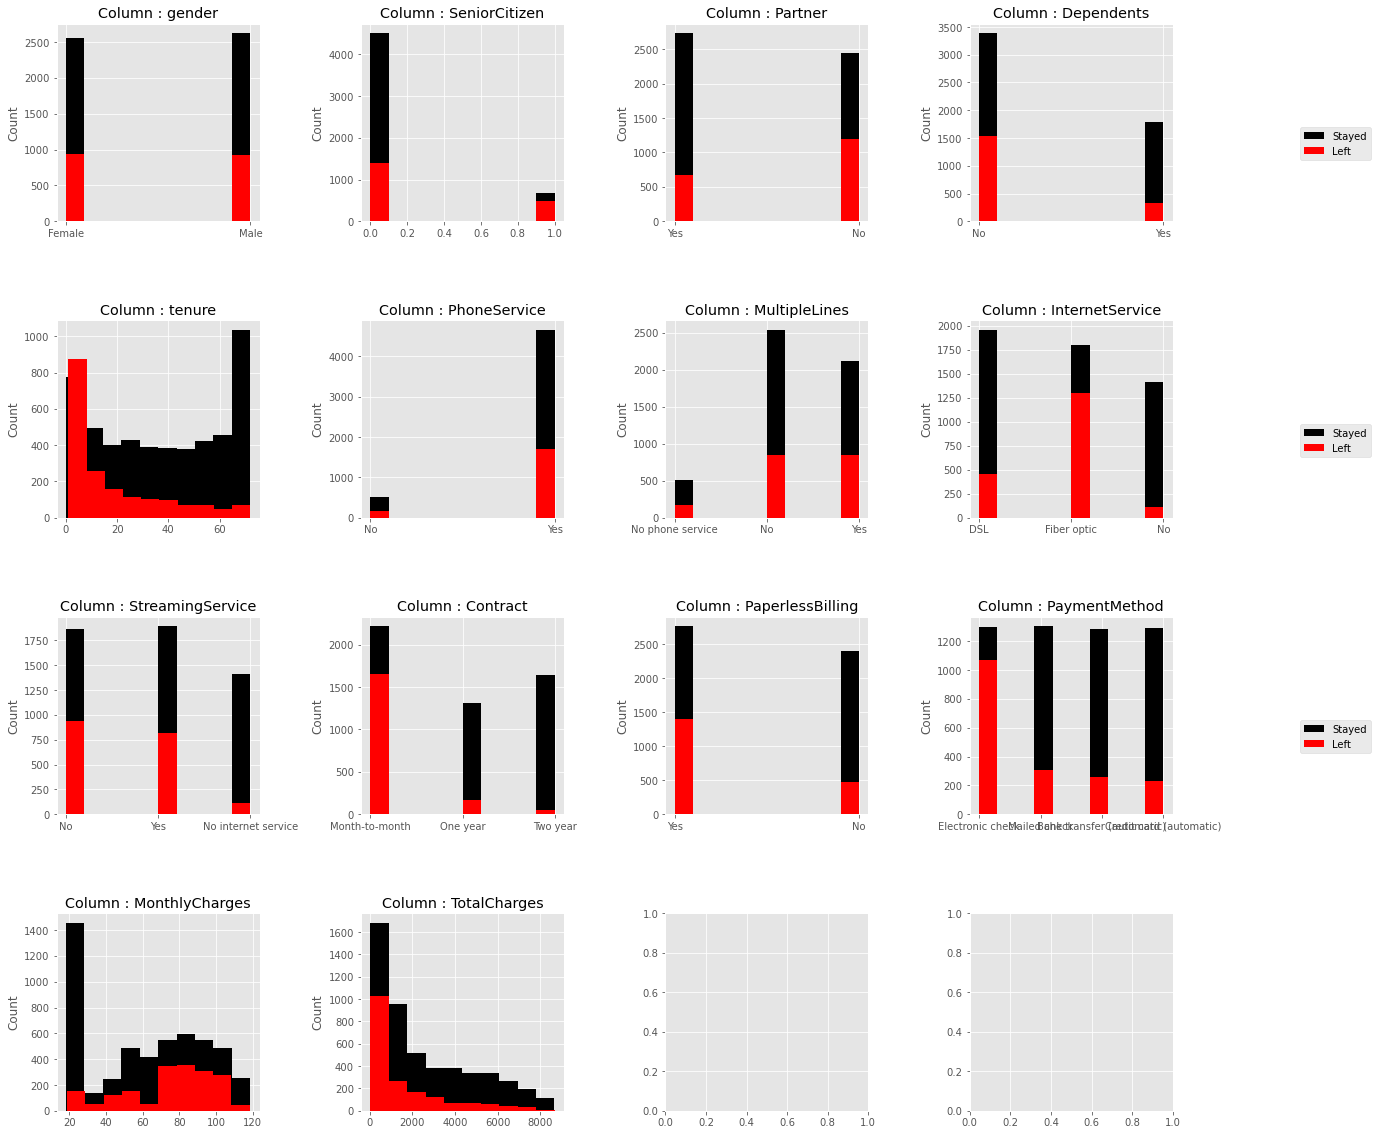

In [44]:
plt.style.use('ggplot')

k=0
fig,ax=plt.subplots(4,4,figsize=(20,20))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for i in data.columns[1:-1]:
    a=k//4
    b=k%4
    ax[a,b].set_title('Column : '+ str(i))
    ax[a,b].hist(data[data['Churn']=='No'][i],label='Stayed',alpha=1,bins=10,color='black')
    ax[a,b].hist(data[data['Churn']=='Yes'][i],label='Left',alpha=1,bins=10,color='red')
    ax[a,b].set_ylabel('Count')
    ax[a,b].legend( bbox_to_anchor=(1.5, 0., 0.5, 0.5))
    k=k+1    
    
plt.show()

In [172]:
data['Percentage']=data['MonthlyCharges']/(data['TotalCharges']+0.00001)
data['Charges']=data['tenure']*data['MonthlyCharges']
data.columns

Index(['customerID',
       'gender',
       'SeniorCitizen',
       'Partner',
       'Dependents',
       'tenure',
       'PhoneService',
       'MultipleLines',
       'InternetService',
       'StreamingService',
       'Contract',
       'PaperlessBilling',
       'PaymentMethod',
       'MonthlyCharges',
       'TotalCharges',
       'Churn',
       'Percentage',
       'Charges'],
      dtype='object')

In [173]:
#Label Encoding
cols=['gender','Partner','Dependents','PhoneService','PaperlessBilling','StreamingService','Churn','MultipleLines','InternetService','StreamingService','Contract','PaymentMethod']
for i in cols:
    labelenc=LabelEncoder()
    data[i]=labelenc.fit_transform(data[i])


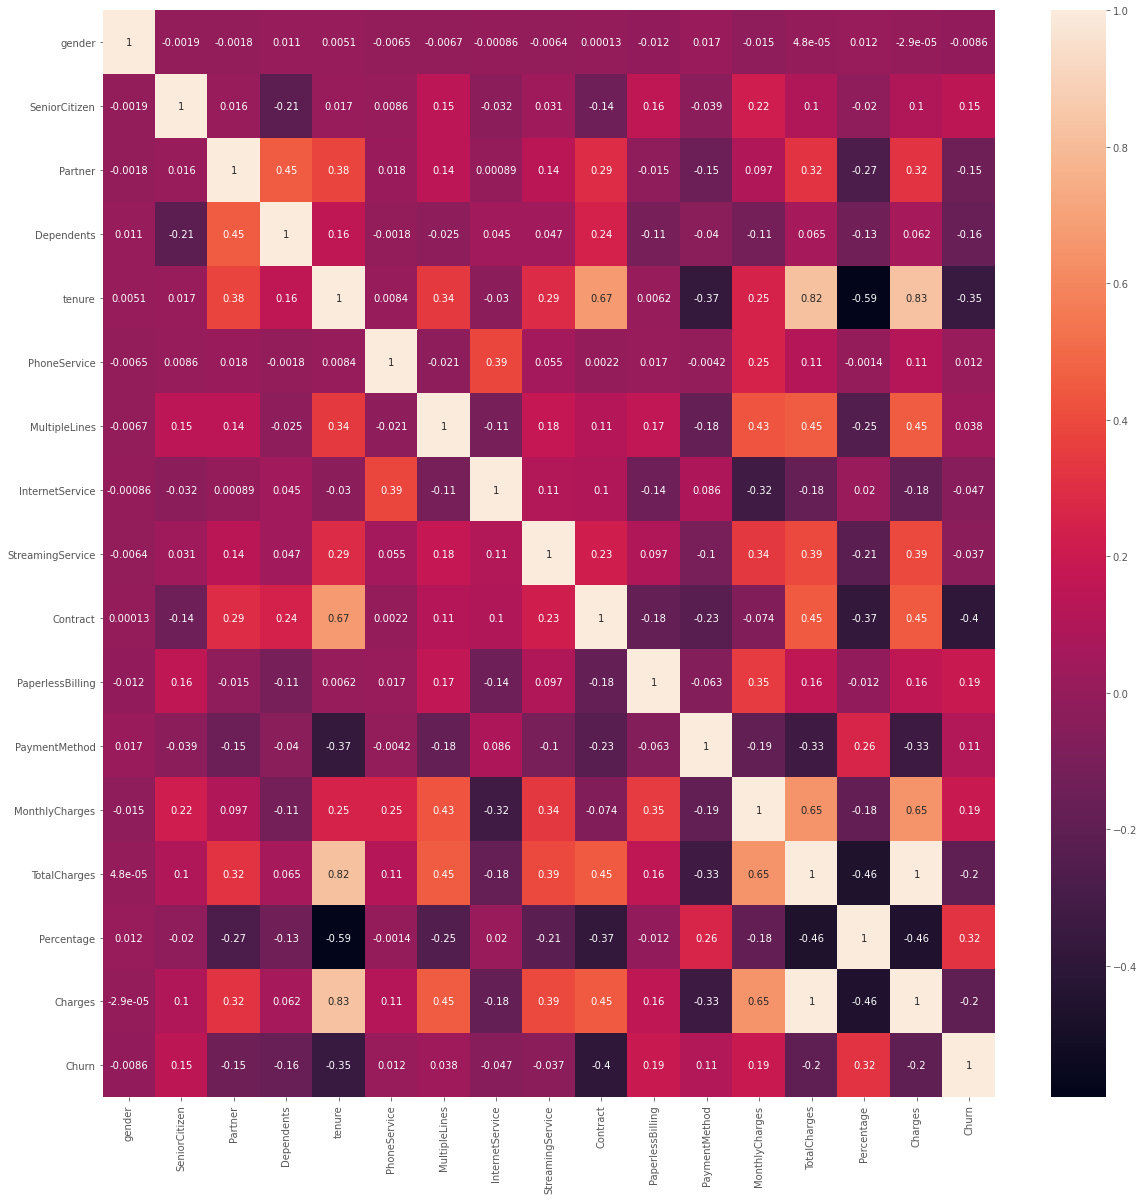

In [174]:
data=data[['customerID',
       'gender',
       'SeniorCitizen',
       'Partner',
       'Dependents',
       'tenure',
       'PhoneService',
       'MultipleLines',
       'InternetService',
       'StreamingService',
       'Contract',
       'PaperlessBilling',
       'PaymentMethod',
       'MonthlyCharges',
       'TotalCharges',
       'Percentage',
       'Charges',
       'Churn',]]
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,)
plt.show()

In [175]:
data=data.drop(columns=['customerID'])
cols=['MultipleLines','InternetService','StreamingService','Contract','PaymentMethod']
df=data[cols]
ohe=OneHotEncoder()
df_tf=ohe.fit_transform(df).toarray()
df_tf=pd.DataFrame(df_tf,index=data.index)
data=pd.concat([data,df_tf],axis=1)
data=data.drop(columns=cols)


In [176]:
Y=data['Churn']
X=data.drop(columns=['Churn'])

In [177]:
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [184]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=3)

In [185]:
rf=RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None,
                          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                          verbose=0, warm_start=False, class_weight={0:1,1:3}, ccp_alpha=0.0, max_samples=None)

classifiers=[GaussianNB(),LogisticRegression(max_iter=5000),
             SVC(kernel='rbf'),KNeighborsClassifier(),DecisionTreeClassifier(),rf,XGBClassifier(scale_pos_weight=10),
             MLPClassifier(hidden_layer_sizes=[10,5],max_iter=5000)]
names=['Naive Bayes','Logistic Regression','Support Vector Machines','KNN','Decision Tree','Random Forest','Extreme Gradient Boosting','Multi-Layered Perceptron']

In [186]:
accuracy=[]
f1=[]
confusion_Matrix=[]
for classifier in classifiers:
    
    clf=classifier.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    
    accuracy.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    confusion_Matrix.append(confusion_matrix(y_test,y_pred))

----------------------------------------------------------------------------
Classifier:  Naive Bayes
Accuracy :  0.7434926644581165
F1 Score :  0.6150568181818181
Confusion Matrix


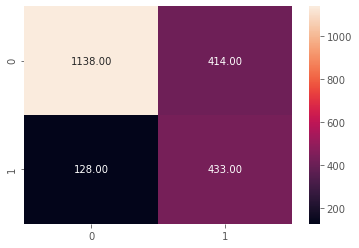

----------------------------------------------------------------------------
Classifier:  Logistic Regression
Accuracy :  0.8021769995267393
F1 Score :  0.5777777777777778
Confusion Matrix


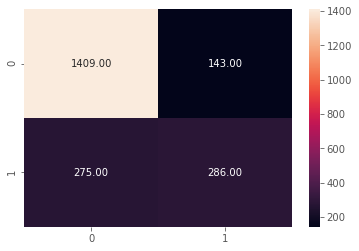

----------------------------------------------------------------------------
Classifier:  Support Vector Machines
Accuracy :  0.7889256980596309
F1 Score :  0.534446764091858
Confusion Matrix


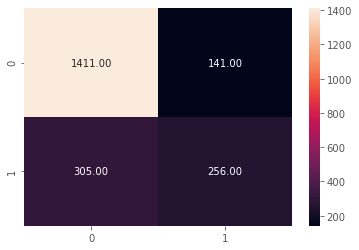

----------------------------------------------------------------------------
Classifier:  KNN
Accuracy :  0.7699952673923331
F1 Score :  0.5281553398058253
Confusion Matrix


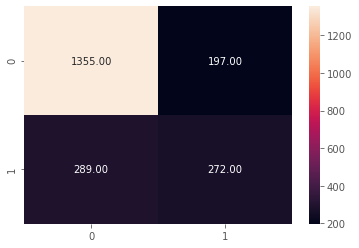

----------------------------------------------------------------------------
Classifier:  Decision Tree
Accuracy :  0.7359204921911974
F1 Score :  0.49364791288566245
Confusion Matrix


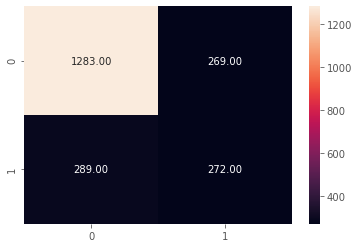

----------------------------------------------------------------------------
Classifier:  Random Forest
Accuracy :  0.7860861334595362
F1 Score :  0.5349794238683128
Confusion Matrix


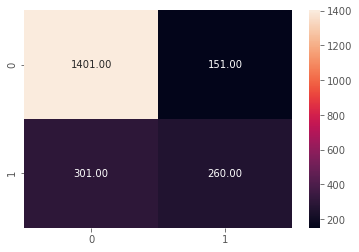

----------------------------------------------------------------------------
Classifier:  Extreme Gradient Boosting
Accuracy :  0.7444391859914813
F1 Score :  0.6041055718475073
Confusion Matrix


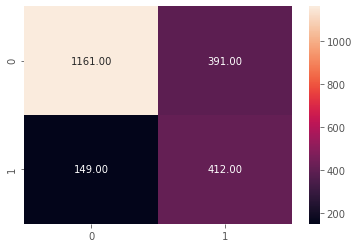

----------------------------------------------------------------------------
Classifier:  Multi-Layered Perceptron
Accuracy :  0.7969711310932324
F1 Score :  0.5671039354187689
Confusion Matrix


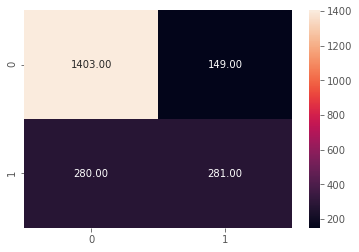

In [189]:
for i in range(0,len(classifiers)):
    print('----------------------------------------------------------------------------')
    print('Classifier: ',names[i])
    print('Accuracy : ',accuracy[i])
    print('F1 Score : ',f1[i])
    print('Confusion Matrix')
    sns.heatmap(confusion_Matrix[i],annot=True,fmt='0.2f')
    plt.show()

In [187]:
#Feature Importances
clf=rf
clf.fit(x_train,y_train)
score=clf.feature_importances_

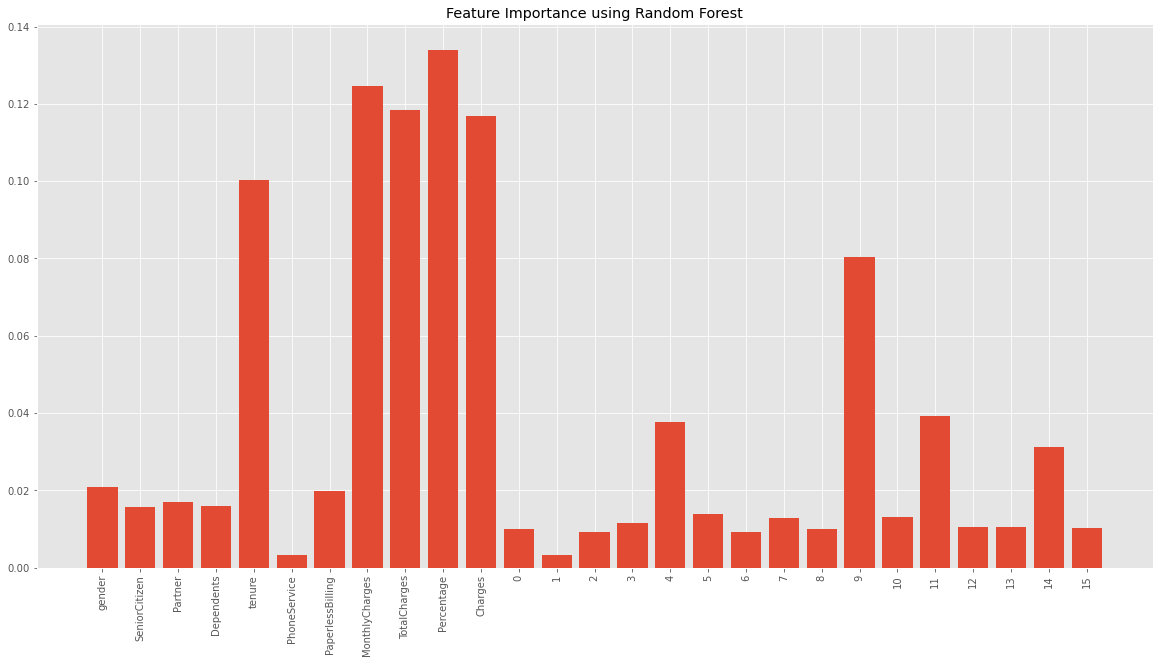

In [190]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title('Feature Importance using Random Forest')
plt.bar(x=np.arange(1,28),height=score,tick_label=list(feature_names))
plt.show()